In [32]:
from pandas import read_csv
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df=pd.read_csv("Data_Glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [34]:
df.shape

(214, 10)

In [35]:
print(df.isna().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [36]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [37]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [38]:
print(df.groupby('Type')['Type'].count())

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64


<AxesSubplot:xlabel='Type', ylabel='count'>

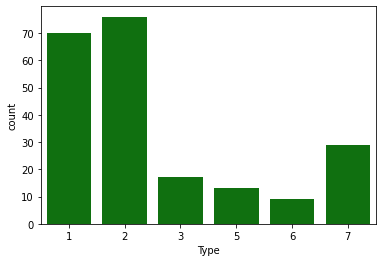

In [39]:
sns.countplot(x = df['Type'], color = 'green')

In [40]:
x = df.iloc[:,:-1].values
x

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [41]:
y = df.iloc[:,-1].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], dtype=int64)

In [42]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
xo,yo=oversample.fit_resample(x,y)

In [43]:
y1=pd.DataFrame(yo)
y1.value_counts()

1    76
2    76
3    76
5    76
6    76
7    76
dtype: int64

<AxesSubplot:title={'center':'after oversampling'}, ylabel='count'>

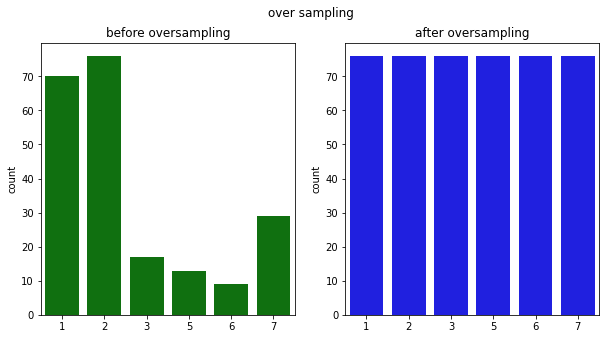

In [44]:
figure, axes = plt.subplots(1,2, sharex=True,figsize=(10,5))
figure.suptitle('over sampling')
axes[0].set_title('before oversampling')
axes[1].set_title('after oversampling')
sns.countplot(x = y, color ='green',ax = axes[0])
sns.countplot(x = yo, color = 'blue',ax = axes[1])

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xo,yo,test_size=0.30,random_state=1)

In [46]:
print('x_train: ',x_train.shape)
print('y_train: ',y_train.shape)
print('x_test:  ',x_test.shape)
print('y_test:  ',y_test.shape)

x_train:  (319, 9)
y_train:  (319,)
x_test:   (137, 9)
y_test:   (137,)


In [47]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [48]:
y_pred = model.predict(x_test)
y_pred

array([1, 3, 5, 3, 3, 6, 6, 7, 7, 2, 5, 6, 5, 7, 2, 5, 2, 5, 3, 6, 1, 7,
       5, 1, 3, 2, 1, 3, 7, 1, 2, 2, 6, 3, 5, 2, 3, 3, 1, 2, 2, 3, 5, 3,
       6, 5, 2, 5, 6, 3, 5, 7, 3, 7, 7, 2, 7, 3, 5, 5, 2, 3, 5, 6, 3, 6,
       5, 6, 3, 5, 7, 5, 1, 6, 7, 5, 5, 2, 6, 7, 1, 2, 6, 1, 6, 5, 7, 3,
       6, 1, 1, 3, 6, 5, 5, 3, 7, 5, 2, 3, 3, 3, 3, 6, 2, 7, 3, 7, 3, 2,
       5, 7, 5, 5, 3, 1, 2, 7, 7, 5, 2, 5, 6, 5, 7, 1, 6, 6, 3, 2, 1, 1,
       1, 3, 3, 5, 5], dtype=int64)

In [49]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[15,  3,  4,  0,  0,  0],
       [ 1, 14,  2,  0,  1,  0],
       [ 0,  0, 23,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0],
       [ 0,  0,  0,  0, 18,  0],
       [ 0,  3,  1,  2,  1, 20]], dtype=int64)

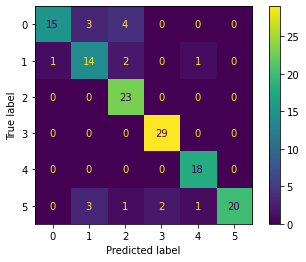

In [50]:
cmd = ConfusionMatrixDisplay(matrix)
cmd.plot()

In [51]:
score = accuracy_score(y_test,y_pred)
print('the accuracy of this model is:',score)

the accuracy of this model is: 0.8686131386861314


In [52]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.94      0.68      0.79        22
           2       0.70      0.78      0.74        18
           3       0.77      1.00      0.87        23
           5       0.94      1.00      0.97        29
           6       0.90      1.00      0.95        18
           7       1.00      0.74      0.85        27

    accuracy                           0.87       137
   macro avg       0.87      0.87      0.86       137
weighted avg       0.88      0.87      0.87       137

